# UTS Kelompok Krawu - Logistic Regression


Pada notebook ini akan dilakukan percobaan klasifikasi menggunakan algoritma Logistic regression\
Rasio training dan test data pada percobaan ini adalah 50/50\
Training menggunakan 30 data pertama dari setiap kelas \
Testing menggunakan 30 data selanjutnya dari setiap kelas \
Percobaan dilakukan sebanyak tiga kali untuk tiga variasi hyperparameter berbeda.\

Dataset yang digunakan adalah data jenis biji gandum yang berjumlah total 200 data dengan 3 jenis kelas.

### 1. Import library dan deklarasi variabel fungsi yang diperlukan

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder as le
from sklearn.model_selection import train_test_split
plt.style.use('grayscale')

### 2. Import dataset iris menjadi variabel dataframe (df)

In [2]:
df = pd.read_csv('seeds.csv')
df

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
0,15.26,14.84,0.8710,5.763,3.312,2.221,5.220,1
1,14.88,14.57,0.8811,5.554,3.333,1.018,4.956,1
2,14.29,14.09,0.9050,5.291,3.337,2.699,4.825,1
3,13.84,13.94,0.8955,5.324,3.379,2.259,4.805,1
4,16.14,14.99,0.9034,5.658,3.562,1.355,5.175,1
...,...,...,...,...,...,...,...,...
194,12.19,13.20,0.8783,5.137,2.981,3.631,4.870,3
195,11.23,12.88,0.8511,5.140,2.795,4.325,5.003,3
196,13.20,13.66,0.8883,5.236,3.232,8.315,5.056,3
197,11.84,13.21,0.8521,5.175,2.836,3.598,5.044,3


### 3. Konfirmasi jumlah data dan menampilkan statistik data

In [3]:
df.describe()

,Area,Perimeter,Compactness,Kernel.Length,Kernel.Width,Asymmetry.Coeff,Kernel.Groove,Type
count,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000,199.000000
mean,14.918744,14.595829,0.870811,5.643151,3.265533,3.699217,5.420653,1.994975
std,2.919976,1.310445,0.023320,0.443593,0.378322,1.471102,0.492718,0.813382
min,10.590000,12.410000,0.808100,4.899000,2.630000,0.765100,4.519000,1.000000
25%,12.330000,13.470000,0.857100,5.267000,2.954500,2.570000,5.046000,1.000000
50%,14.430000,14.370000,0.873400,5.541000,3.245000,3.631000,5.228000,2.000000
75%,17.455000,15.805000,0.886800,6.002000,3.564500,4.799000,5.879000,3.000000
max,21.180000,17.250000,0.918300,6.675000,4.033000,8.315000,6.550000,3.000000


### 4. Verifikasi jumlah data untuk setiap spesies

In [4]:
df['Type'].value_counts()

2    68
1    66
3    65
Name: Type, dtype: int64

### 5. Mencari apakah ada kolom yang kosong, jika ada yang kosong maka kita perlu melengkapinya

In [5]:
df.isnull().sum()

Area               0
Perimeter          0
Compactness        0
Kernel.Length      0
Kernel.Width       0
Asymmetry.Coeff    0
Kernel.Groove      0
Type               0
dtype: int64

### 6. Plotting data untuk melihat persebaran data

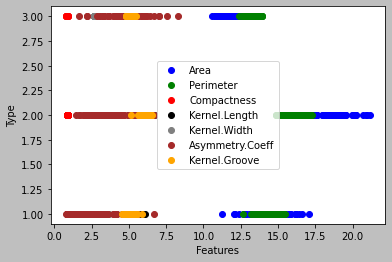

In [6]:
plt.xlabel('Features')
plt.ylabel('Type')

pltX = df.loc[:, 'Area']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'blue', label = 'Area')

pltX = df.loc[:, 'Perimeter']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'green', label = 'Perimeter')

pltX = df.loc[:, 'Compactness']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'red', label = 'Compactness')

pltX = df.loc[:, 'Kernel.Length']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'black', label = 'Kernel.Length')

pltX = df.loc[:, 'Kernel.Width']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'grey', label = 'Kernel.Width')

pltX = df.loc[:, 'Asymmetry.Coeff']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'brown', label = 'Asymmetry.Coeff')

pltX = df.loc[:, 'Kernel.Groove']
pltY = df.loc[:, 'Type']
plt.scatter(pltX, pltY, color = 'orange', label = 'Kernel.Groove')

plt.legend()
plt.show()

### 7. Split data sesuai permintaan.
Splitting data dilakukan dengan perbandingan 50:50. Splitting data dilakukan secara manual dikarenakan classifier logistic regression mengharuskan jumlah data yang diinput sama sehingga jika menggunakan train_test_split akan terjadi error. Seperti yang diketahui sebelumnya dataset ini memiliki jumlah data yang berbeda perkelasnya jadi diputuskan untuk menggunakan cara manual.

In [7]:
x_train = df.loc[np.r_[0:30, 67:97, 137:167], ['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']]
y_train = df.loc[np.r_[0:30, 67:97, 137:167], ['Type']]
                   
x_test = df.loc[np.r_[30:60, 97:127, 167:197], ['Area','Perimeter','Compactness','Kernel.Length','Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']]
y_test = df.loc[np.r_[30:60, 97:127, 167:197], ['Type']]

#x_train, y_train, x_test, y_test = train_test_split(X, Y, test_size = 0.5, random_state = 0)
#print(x_train)
#print(y_train.values.ravel())

### 9. Lakukan percobaan
#### Percobaan 1: hyperparameter default

In [8]:
model = LogisticRegression(max_iter = 20000)
model.fit(x_train, y_train.values.ravel())

LogisticRegression(max_iter=20000)

In [9]:
print("Accuracy: ",model.score(x_train, y_train) * 100)
print("Accuracy: ",model.score(x_test, y_test) * 100)

y_pred = model.predict(x_test)
acc1a = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Accuracy score training data 1: ', acc1a)

Accuracy:  98.88888888888889
Accuracy:  91.11111111111111
Accuracy score training data 1:  0.9111111111111111


[[26  3  1]
 [ 1 29  0]
 [ 3  0 27]]


<function matplotlib.pyplot.show(close=None, block=None)>

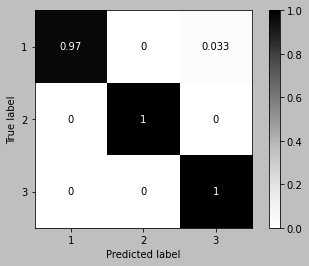

In [10]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
matrix1a = plot_confusion_matrix(model, x_train, y_train, normalize = 'true', cmap=plt.cm.Greys)
plt.show

#### Percobaan 2: menggunakan param solver liblinear dan random state = 42

In [11]:
model2 = LogisticRegression(solver = 'liblinear', random_state = 42)
model2.fit(x_train, y_train.values.ravel())

LogisticRegression(random_state=42, solver='liblinear')

Accuracy score training data 2:  0.9222222222222223
[[26  3  1]
 [ 1 29  0]
 [ 2  0 28]]


<function matplotlib.pyplot.show(close=None, block=None)>

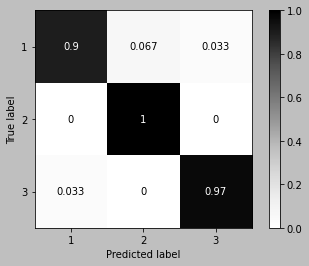

In [12]:
y_pred = model2.predict(x_test)
acc1b = accuracy_score(y_true = y_test, y_pred = y_pred) 
print('Accuracy score training data 2: ', acc1b)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
matrix1b = plot_confusion_matrix(model2, x_train, y_train, normalize = 'true', cmap=plt.cm.Greys)
plt.show

#### Percobaan 3: menggunakan param class weight = balanced

In [13]:
model3 = LogisticRegression(class_weight = 'balanced', max_iter = 20000)
model3.fit(x_train, y_train.values.ravel())

LogisticRegression(class_weight='balanced', max_iter=20000)

Accuracy score training data 3:  0.9111111111111111
[[26  3  1]
 [ 1 29  0]
 [ 3  0 27]]


<function matplotlib.pyplot.show(close=None, block=None)>

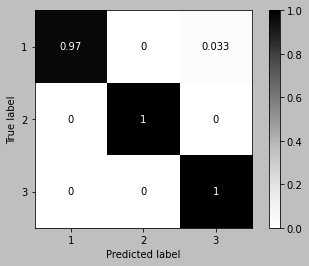

In [14]:
y_pred = model3.predict(x_test)
acc1c = accuracy_score(y_true = y_test, y_pred = y_pred)
print('Accuracy score training data 3: ', acc1c)

cm = metrics.confusion_matrix(y_test, y_pred)
print(cm)
matrix1c = plot_confusion_matrix(model3, x_train, y_train, normalize = 'true', cmap=plt.cm.Greys)
plt.show

### Cross Validation
#### Data train dan test akan ditukar untuk verifikasi hasil. 

In [15]:
xtrain = x_test
ytrain = y_test
xtest = x_train
ytest = y_train

#### Percobaan 4: default parameter

In [16]:
model4 = LogisticRegression(max_iter = 20000)
model4.fit(xtrain, ytrain.values.ravel())

LogisticRegression(max_iter=20000)

In [17]:
print("Accuracy: ",model4.score(xtrain, ytrain) * 100)
print("Accuracy: ",model4.score(xtest, ytest) * 100)

y_pred = model4.predict(xtest)
acc2a = accuracy_score(y_true = ytest, y_pred = y_pred)
print('Accuracy score training data 1: ', acc2a)

Accuracy:  92.22222222222223
Accuracy:  98.88888888888889
Accuracy score training data 1:  0.9888888888888889


[[29  0  1]
 [ 0 30  0]
 [ 0  0 30]]


<function matplotlib.pyplot.show(close=None, block=None)>

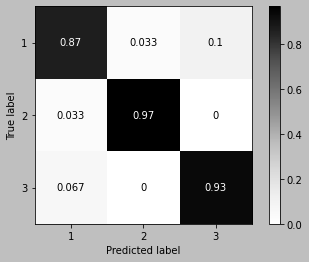

In [18]:
from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)
matrix2a = plot_confusion_matrix(model4, xtrain, ytrain, normalize = 'true', cmap=plt.cm.Greys)
plt.show

#### Percobaan 5: solver liblinear dan random state = 42

In [19]:
model5 = LogisticRegression(solver = 'liblinear', random_state = 42)
model5.fit(xtrain, ytrain.values.ravel())

LogisticRegression(random_state=42, solver='liblinear')

Accuracy score training data 2:  0.9666666666666667
[[28  0  2]
 [ 0 30  0]
 [ 1  0 29]]


<function matplotlib.pyplot.show(close=None, block=None)>

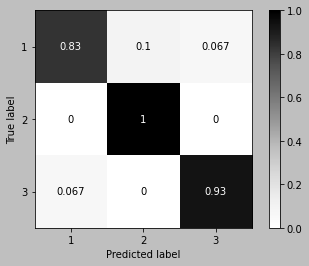

In [20]:
y_pred = model5.predict(xtest)
acc2b = accuracy_score(y_true = ytest, y_pred = y_pred)
print('Accuracy score training data 2: ', acc2b)

cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)
matrix2b = plot_confusion_matrix(model5, xtrain, ytrain, normalize = 'true', cmap=plt.cm.Greys)
plt.show

#### Percobaan 6: class weight balanced

In [21]:
model6 = LogisticRegression(class_weight = 'balanced', max_iter = 20000)
model6.fit(xtrain, ytrain.values.ravel())

LogisticRegression(class_weight='balanced', max_iter=20000)

Accuracy score training data 3:  0.9888888888888889
[[29  0  1]
 [ 0 30  0]
 [ 0  0 30]]


<function matplotlib.pyplot.show(close=None, block=None)>

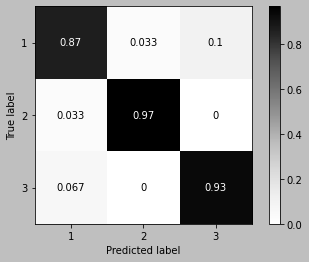

In [22]:
y_pred = model6.predict(xtest)
acc2c = accuracy_score(y_true = ytest, y_pred = y_pred)
print('Accuracy score training data 3: ', acc2c)

cm = metrics.confusion_matrix(ytest, y_pred)
print(cm)
matrix2c = plot_confusion_matrix(model6, xtrain, ytrain, normalize = 'true', cmap=plt.cm.Greys)
plt.show

### Plot bar untuk mengetahui perbandingan akurasi

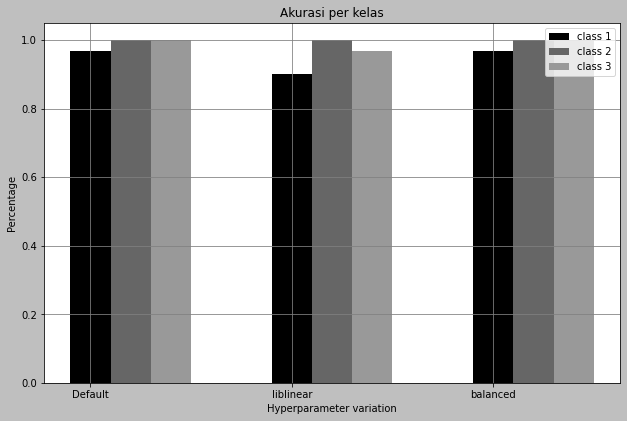

In [23]:
data1a = [matrix1a.confusion_matrix[0][0],
          matrix1b.confusion_matrix[0][0], 
          matrix1c.confusion_matrix[0][0]]

data2a = [matrix1a.confusion_matrix[1][1],
          matrix1b.confusion_matrix[1][1], 
          matrix1c.confusion_matrix[1][1]]

data3a = [matrix1a.confusion_matrix[2][2],
          matrix1b.confusion_matrix[2][2], 
          matrix1c.confusion_matrix[2][2]]

width = 0.2
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder=0, color='gray')

# Show data in plots
ax.bar(np.arange(len(data1a)), data1a, width=width)
ax.bar(np.arange(len(data2a))+ width, data2a, width=width)
ax.bar(np.arange(len(data3a))+ 2*width, data3a, width=width)

# add axis labels
xLabel = ['Default', 'liblinear', 'balanced']

ax.legend(labels=['class 1', 'class 2', 'class 3'])
plt.xticks(np.arange(len(data1a)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas')

plt.show()

### Plot bar untuk perbandingan akurasi cross validation

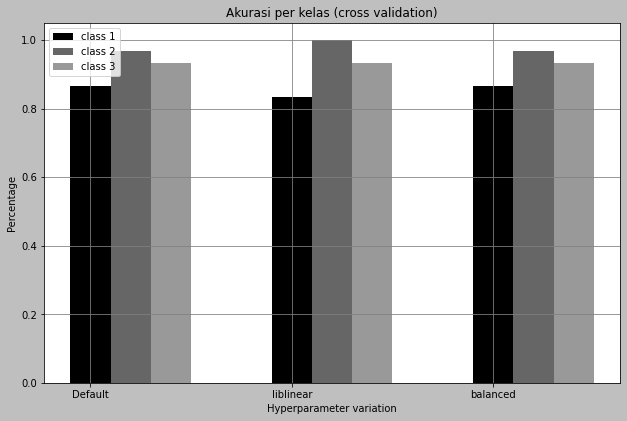

In [24]:
data4a = [matrix2a.confusion_matrix[0][0],
          matrix2b.confusion_matrix[0][0], 
          matrix2c.confusion_matrix[0][0]]

data5a = [matrix2a.confusion_matrix[1][1],
          matrix2b.confusion_matrix[1][1], 
          matrix2c.confusion_matrix[1][1]]

data6a = [matrix2a.confusion_matrix[2][2],
          matrix2b.confusion_matrix[2][2], 
          matrix2c.confusion_matrix[2][2]]

width = 0.2
fig = plt.figure(figsize= (8,5))
ax = fig.add_axes([0,0,1,1])
ax.grid(zorder=0, color='gray')

# Show data in plots
ax.bar(np.arange(len(data4a)), data4a, width=width)
ax.bar(np.arange(len(data5a))+ width, data5a, width=width)
ax.bar(np.arange(len(data6a))+ 2*width, data6a, width=width)

# add axis labels
xLabel = ['Default', 'liblinear', 'balanced']

ax.legend(labels=['class 1', 'class 2', 'class 3'])
plt.xticks(np.arange(len(data5a)), xLabel)
plt.xlabel('Hyperparameter variation')
plt.ylabel('Percentage')
ax.set_title('Akurasi per kelas (cross validation)')

plt.show()

<ipython-input-25-58bc5a7b1a03>:23: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)
<ipython-input-25-58bc5a7b1a03>:27: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax = plt.subplot(111)


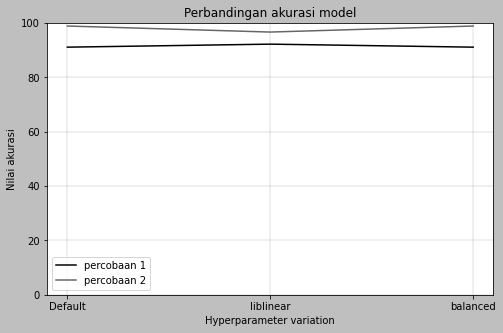

In [25]:
# Grafik perbandingan akurasi model
fig = plt.figure(figsize= (8,5))

# memasukkan data akurasi 
x_line1 = ['Default', 'liblinear', 'balanced']
y_line1 = [acc1a * 100, acc1b * 100, acc1c * 100]

# # line 1
# plt.plot(x_line1, y_line1)
plt.ylim(bottom=0, top=1)

# memasukkan data akurasi setelah ditukar 
x_line2 = ['Default', 'liblinear', 'balanced']
y_line2 = [acc2a * 100, acc2b * 100, acc2c * 100]

# # line 2 (dotted)
plt.ylim(bottom=0, top=100)
  
plt.xlabel("Hyperparameter variation")
plt.ylabel("Nilai akurasi")
plt.title('Perbandingan akurasi model')

ax = plt.subplot(111)
ax.plot(x_line1, y_line1, label='percobaan 1')
ax.plot(x_line1, y_line2, label='percobaan 2')

ax = plt.subplot(111)
plt.grid(color='grey', linewidth=0.25)
ax.legend()
plt.show()

### Export CSV hasil prediction untuk seluruh dataframe menggunakan model terbaik

In [26]:
X = df.iloc[:, :-1]
colu = df[['Area', 'Perimeter', 'Compactness', 'Kernel.Length', 'Kernel.Width', 'Asymmetry.Coeff', 'Kernel.Groove']]
col = colu.columns



dout = X
dout['Type'] = model4.predict(X)
print(dout)
dout.to_csv('logistic-Out.csv')

      Area  Perimeter  Compactness  Kernel.Length  Kernel.Width  \
0    15.26      14.84       0.8710          5.763         3.312   
1    14.88      14.57       0.8811          5.554         3.333   
2    14.29      14.09       0.9050          5.291         3.337   
3    13.84      13.94       0.8955          5.324         3.379   
4    16.14      14.99       0.9034          5.658         3.562   
..     ...        ...          ...            ...           ...   
194  12.19      13.20       0.8783          5.137         2.981   
195  11.23      12.88       0.8511          5.140         2.795   
196  13.20      13.66       0.8883          5.236         3.232   
197  11.84      13.21       0.8521          5.175         2.836   
198  12.30      13.34       0.8684          5.243         2.974   

     Asymmetry.Coeff  Kernel.Groove  Type  
0              2.221          5.220     1  
1              1.018          4.956     1  
2              2.699          4.825     1  
3              2.25

In [31]:
avgAcc = ((((acc1a + acc1b + acc1c)/3) + ((acc2a + acc2b + acc2c)/3))/2)

In [32]:
print(avgAcc)

0.9481481481481482
